In [6]:
# add tools and modules contained within tools (numpy, scipy, pandas, blabla)
import sys
sys.path.insert(0, "../../library")
from bikbox import *
from LIDAR import *

from collections import namedtuple

from os import path

from scipy.stats import linregress

# configure matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import matplotlib.cm as cm
import matplotlib as mpl

from windrose import WindroseAxes

from bokeh.io import output_notebook, show
from bokeh.plotting import figure

from mpl_toolkits.mplot3d import Axes3D

from math import sqrt
from math import log

from scipy.signal import find_peaks

from glob import glob

import io       # used to generate a string buffer

from zipfile import ZipFile

# enable auto reloading of external modules
%reload_ext autoreload
%autoreload 2

# %matplotlib ipympl
# %matplotlib widget
# %matplotlib notebook
%matplotlib inline

sen_green = '#1f986d'

single_column_size = (3.22, 3.22)
double_column_size = (6.44, 3.22)

# matplotlib config

mpl.rcParams['figure.figsize'] = [7.0, 6.0]
#mpl.rcParams['figure.dpi'] = 15
mpl.rcParams['savefig.dpi'] = 150

mpl.rcParams['font.size'] = 12
#mpl.rcParams['legend.fontsize'] = 'large'
#mpl.rcParams['figure.titlesize'] = 'medium'

#axes.spines.left   : True   ## display axis spines
#axes.spines.bottom : True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
#ax.spines['right'].set_color('none')
#ax.spines['top'].set_color('none')

cmap = plt.get_cmap('jet', 14)

def cc(n=14):
    return iter(cm.viridis(np.linspace(0,1,14)))

labelmap = dict()

linCorr = namedtuple('linCorr', 'slope intercept r_value p_value std_err')

i = 1
for bwdir in sorted(glob('../../../data/BW??')):
    bw = bwdir.split('/')[-1]
    # if bw in ('BW74', 'BW76',): continue
    print(bw)
    fused_file = '{}/{}_fused3.pickle'.format(bwdir, bw)
    if path.isfile(fused_file):
        labelmap[bw] = 'OWT {}'.format(i)
        i += 1


BW10
BW11
BW19
BW20
BW30
BW45
BW56
BW57
BW59
BW60
BW67
BW68
BW70
BW71
BW73
BW74
BW75
BW76
BW77
BW78


# OMAE 2020

This notebook is used to generate the data figures for the corresponding conference-paper, titled __Relative Motion during Single Blade Installation: Measurements from the North Sea__


## Data and Methods

Based on data from the BW77 TNH configuration, an exemplary plot, depicting raw signal processing and the resulting orbit is generated

## Largest Dataset: BW77

In [3]:
d = pd.read_pickle('../../../data/BW77/BW77_fused2.pickle')
d_raw = pd.read_pickle('../../../data/BW77/BW77_HeliHoist_Integrals_TNH.pickle')

In [4]:
start=pd.to_datetime('2019-09-04 11:43:30').tz_localize('Europe/Berlin')
stop=pd.to_datetime('2019-09-04 11:46:00').tz_localize('Europe/Berlin')

print(d[start:stop].index - start)

TimedeltaIndex(['00:00:00.021000', '00:00:00.054000', '00:00:00.087000',
                '00:00:00.120000', '00:00:00.153000', '00:00:00.186000',
                '00:00:00.219000', '00:00:00.252000', '00:00:00.285000',
                '00:00:00.318000',
                ...
                '00:02:29.676000', '00:02:29.709000', '00:02:29.742000',
                '00:02:29.775000', '00:02:29.808000', '00:02:29.841000',
                '00:02:29.874000', '00:02:29.907000', '00:02:29.940000',
                '00:02:29.973000'],
               dtype='timedelta64[ns]', length=4545, freq=None)


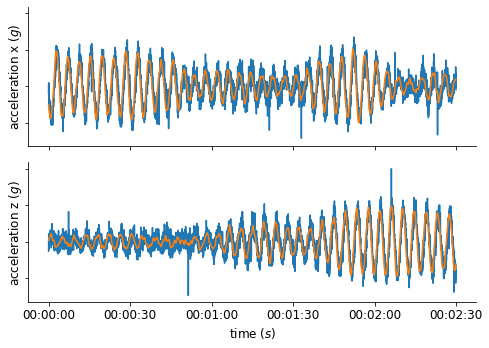

In [9]:
plt.figure(figsize=(7,5))

ax1 = plt.subplot(211)
plt.plot(pd.to_datetime(d_raw[start:stop].index - start).tz_localize('Europe/Berlin'),
         d_raw[start:stop].acc_xr,
         color='tab:blue',         
        )
plt.plot(pd.to_datetime(d_raw[start:stop].index - start).tz_localize('Europe/Berlin'),
         d_raw[start:stop].acc_xrf,
         color='tab:orange',         
        )
#plt.setp(ax1.get_xticklabels(), fontsize=6)
plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax1.get_yticklabels(), visible=False)
ax1.set_ylabel('acceleration x $(g)$')

# share x only
ax2 = plt.subplot(212, sharex=ax1, sharey=ax1)
plt.plot(pd.to_datetime(d_raw[start:stop].index - start).tz_localize('Europe/Berlin'),
         d_raw[start:stop].acc_zr,
         color='tab:blue',
        )
plt.plot(pd.to_datetime(d_raw[start:stop].index - start).tz_localize('Europe/Berlin'),
         d_raw[start:stop].acc_zrf,
         color='tab:orange',
        )
plt.setp(ax2.get_yticklabels(), visible=False)
ax2.set_xlabel('time $(s)$')
ax2.set_ylabel('acceleration z $(g)$')
plt.tight_layout()
plt.savefig('timeseries.png', dpi=150)

<IPython.core.display.Javascript object>


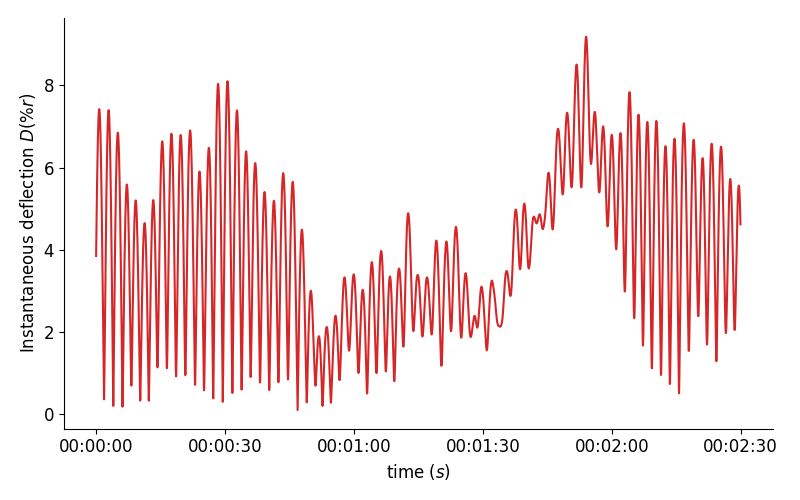

In [55]:


plt.figure(figsize=(8,5))


plt.plot(pd.to_datetime(d[start:stop].index - start).tz_localize('Europe/Berlin'),
         (1 - (3 - d[start:stop].deflection) / 3)*100,
         color = 'tab:red'
        )
ax2 = plt.gca()
#ax2.set_xticklabels([])
#ax2.set_xticks([])
ax2.set_ylabel('Instantaneous deflection $D (\% r)$')
ax2.set_xlabel('time $(s)$')

#x2.set_xticks([])
#ax1.set_yticks([])
plt.tight_layout()
plt.savefig('deflection.png', dpi=150)

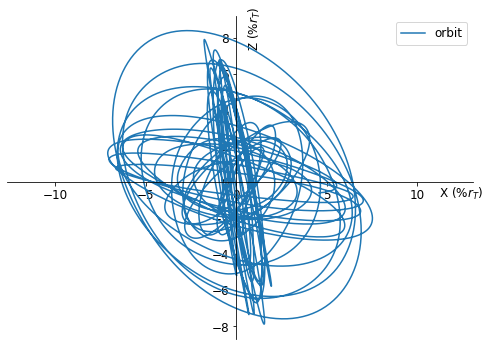

In [10]:
start=pd.to_datetime('2019-09-04 11:43:30').tz_localize('Europe/Berlin')
stop=pd.to_datetime('2019-09-04 11:46:00').tz_localize('Europe/Berlin')

plt.figure(figsize=(7,5))

plt.plot((1 - (3 - d[start:stop].pos_z) / 3)*100, 
         (1 - (3 - d[start:stop].pos_x) / 3)*100,
         label='orbit'
        )
ax1 = plt.gca()
ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')

ax1.spines['bottom'].set_position(('data',0))
ax1.spines['left'].set_position(('data',0))

ax1.legend()
ax1.set_xlabel('X $(\% r_T)$')
ax1.set_ylabel('Z $(\% r_T)$')
ax1.xaxis.set_label_coords(0.975, 0.475)
ax1.yaxis.set_label_coords(0.55, 0.96)

ax1.axis('equal')
plt.tight_layout()
plt.savefig('orbit.svg', dpi=150)

In [78]:
print(d.index[1]-d.index[0])
#print(d.wind_speed.resample('1s').mean())
print(d.wind_speed.isnull().any())

0 days 00:00:00.033000
False


<IPython.core.display.Javascript object>


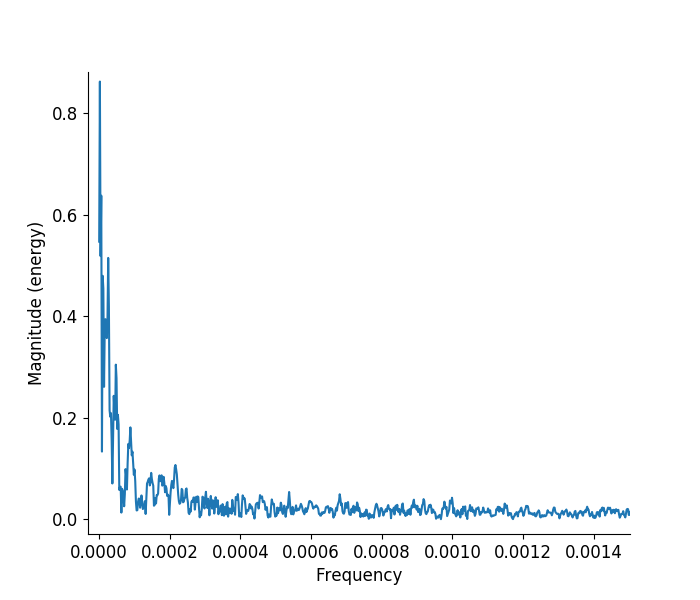

(array([0.54713628, 0.86246517, 0.51866863, ..., 0.00349594, 0.00200054,
        0.00113932]),
 array([0.00000000e+00, 1.96240041e-06, 3.92480082e-06, ...,
        1.66627419e-02, 1.66647043e-02, 1.66666667e-02]),
 <matplotlib.lines.Line2D at 0x7fa74edc7910>)

In [82]:
plt.figure()
plt.magnitude_spectrum(d.wind_speed.resample('30s').mean() - d.wind_speed.mean(), Fs=1/30)

## scatter plots

In [259]:
bws = dict()
for bwdir in sorted(glob('../../../data/BW??')):
    bw = bwdir.split('/')[-1]
    # if bw in ('BW77', 'BW76'): continue
    print(bw)
    fused_file = '{}/{}_fused5.pickle'.format(bwdir, bw)
    if path.isfile(fused_file):
        bws[bw] = pd.read_pickle(fused_file)

BW11
BW20
BW45
BW56
BW57
BW59
BW60
BW67
BW68
BW70
BW71
BW73
BW74
BW75
BW76
BW77
BW78


## Results
### d10 vs Hs

<IPython.core.display.Javascript object>


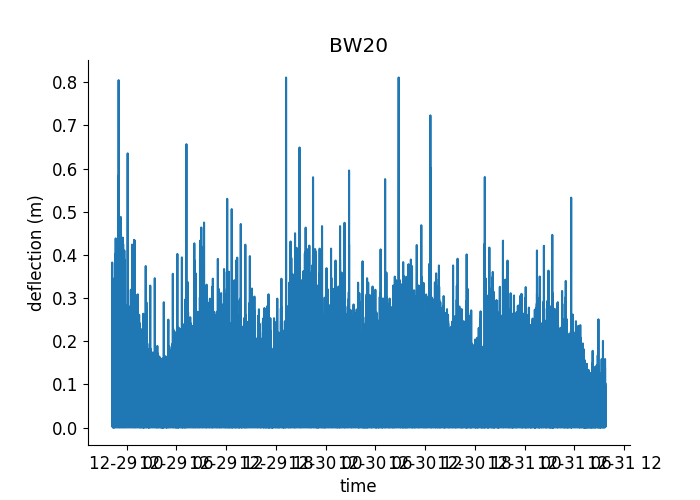

<IPython.core.display.Javascript object>


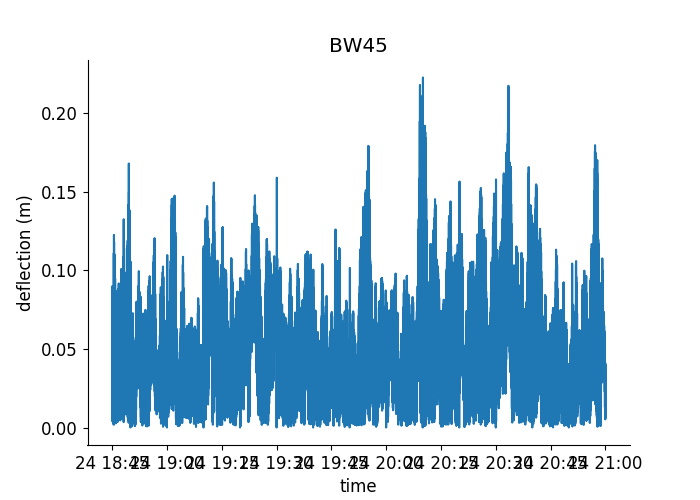

<IPython.core.display.Javascript object>


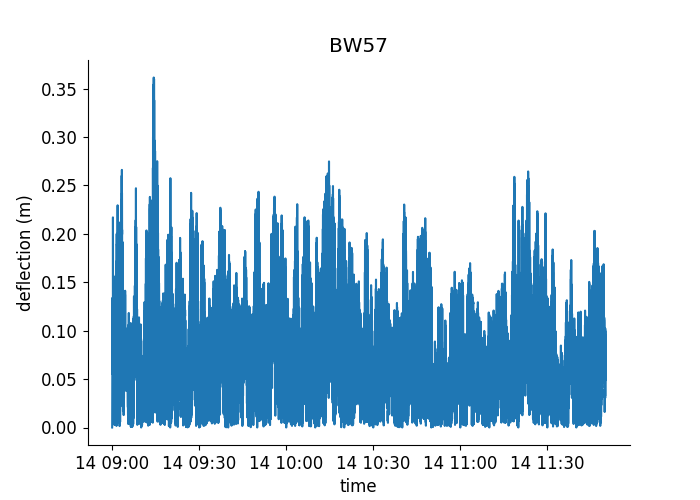

<IPython.core.display.Javascript object>


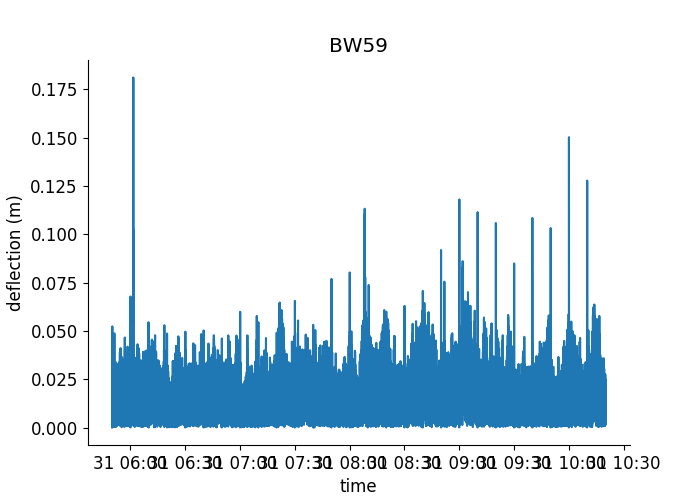

<IPython.core.display.Javascript object>


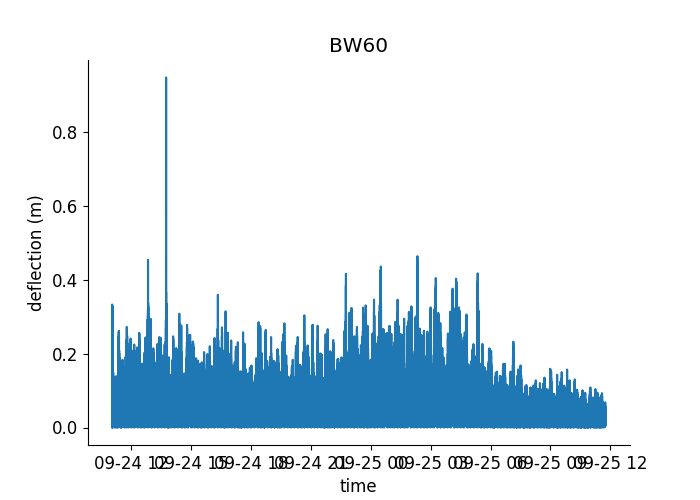

<IPython.core.display.Javascript object>


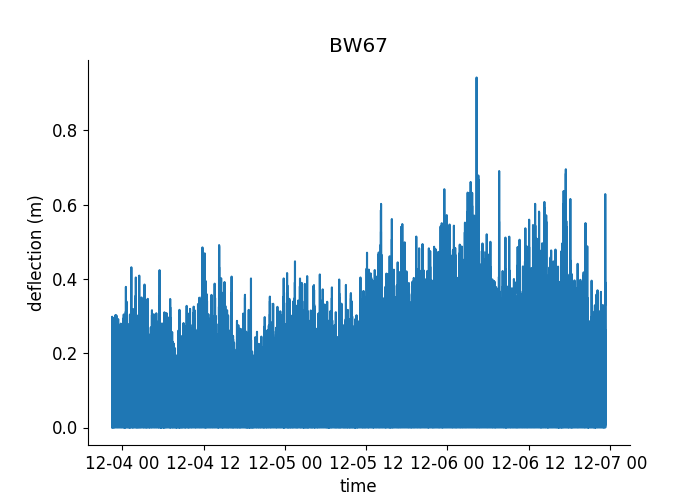

<IPython.core.display.Javascript object>


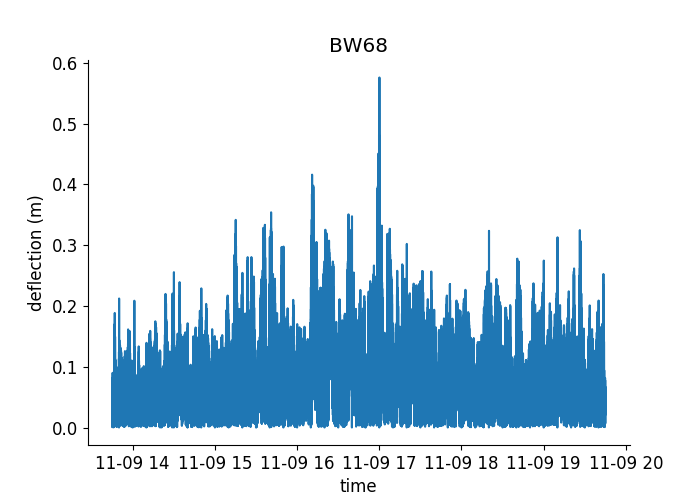

<IPython.core.display.Javascript object>


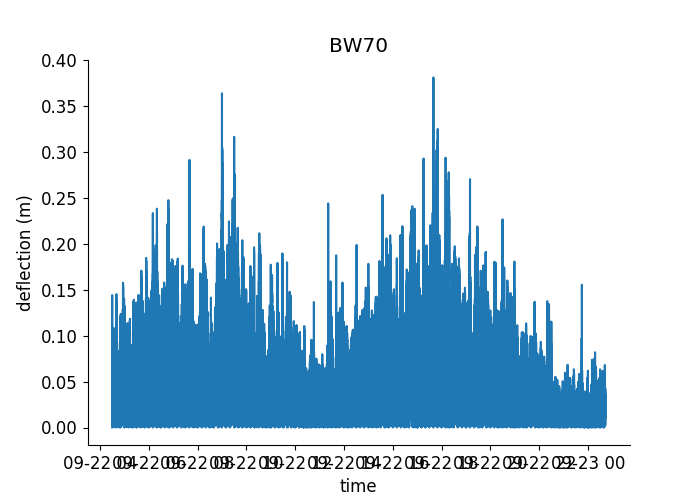

<IPython.core.display.Javascript object>


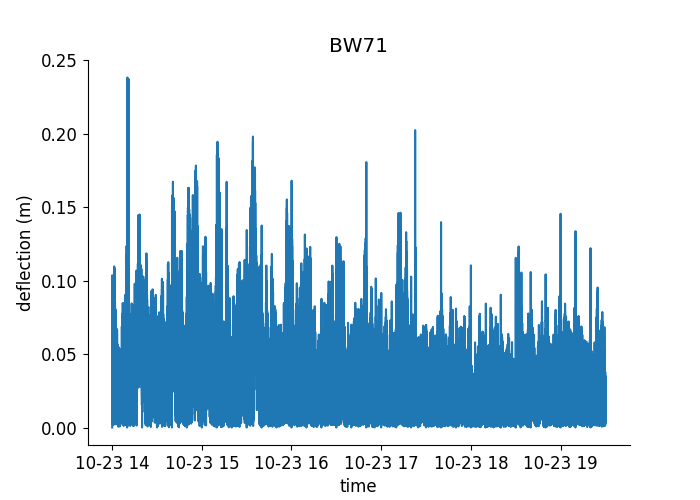

<IPython.core.display.Javascript object>


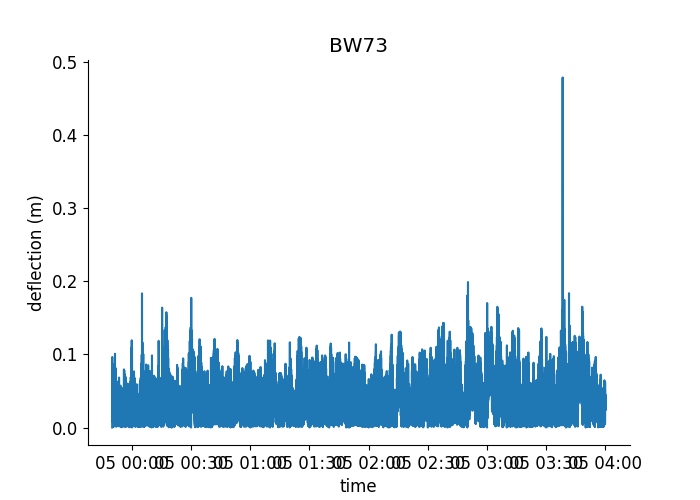

/home/san/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


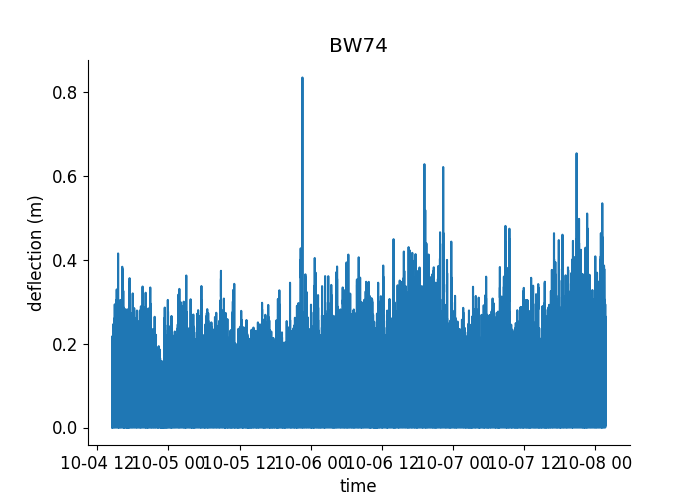

<IPython.core.display.Javascript object>


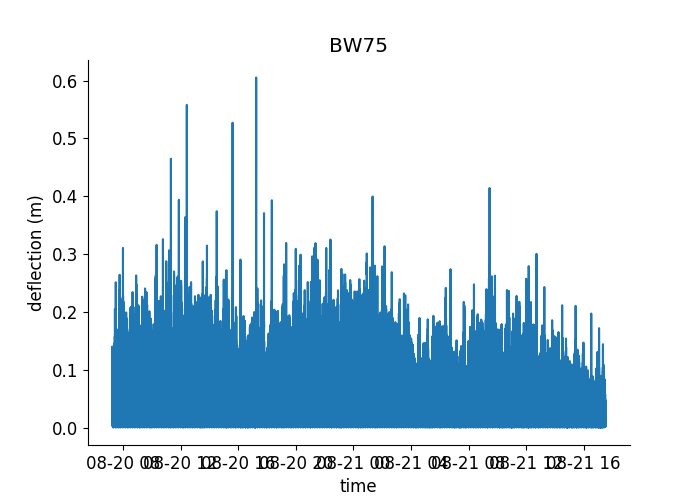

<IPython.core.display.Javascript object>


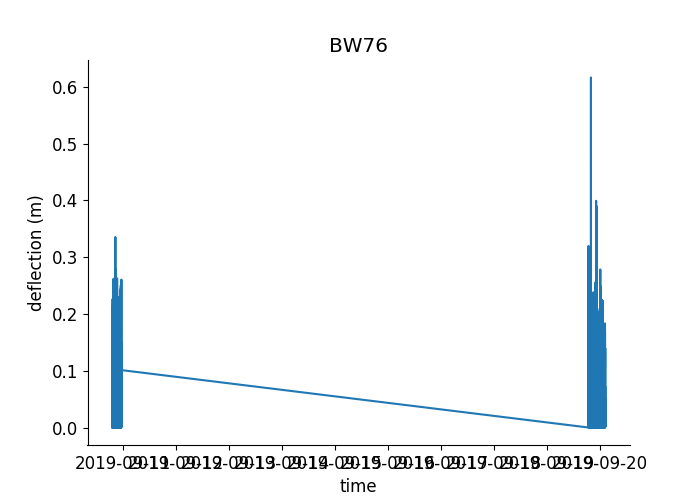

<IPython.core.display.Javascript object>


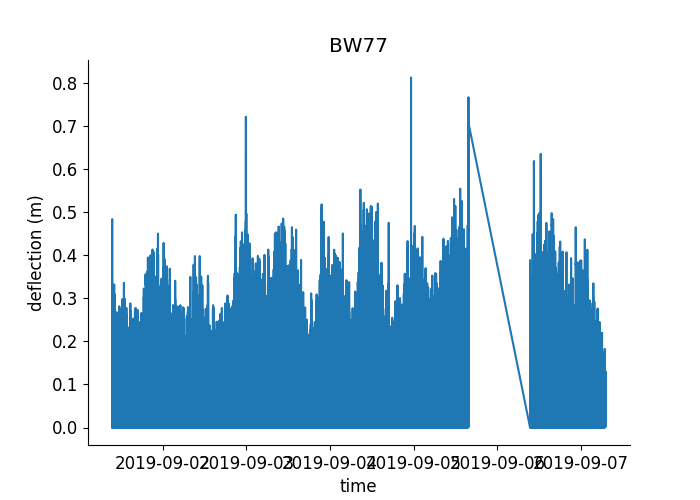

In [266]:
for k in bws:
    plt.figure(figsize=(7,5))
    plt.plot(bws[k].deflection)
    plt.title(k)
    plt.xlabel('time')
    plt.ylabel('deflection (m)')

In [261]:
# slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
# flat_list = [item for sublist in l for item in sublist]
df = pd.concat([bws[k] for k in bws])

In [450]:
Hs10 = df.Hs.resample('10min').mean()
d10 = (1 - (3 - df.deflection.resample('10min').mean())/3)*100
U10 = df.wind_speed.resample('10min').mean()
Tp10 = df.Tz.resample('10min').mean()*1.28

Hs10.dropna(inplace=True)
d10.dropna(inplace=True)
U10.dropna(inplace=True)
Tp10.dropna(inplace=True)


df10 = pd.merge(d10, U10, how='inner', left_index=True, right_index=True)
df10 = pd.merge(df10, Hs10, how='inner', left_index=True, right_index=True)
df10 = pd.merge(df10, Tp10, how='inner', left_index=True, right_index=True)

waveCorr = linCorr(*linregress(df10.Hs.values, df10.deflection.values))
windCorr = linCorr(*linregress(df10.wind_speed.values, df10.deflection.values))
windWaveCorr = linCorr(*linregress(df10.wind_speed.values, df10.Hs.values))

d10_waveModel = df10.deflection / (waveCorr.slope * df10.Hs + waveCorr.intercept)
d10_windModel = df10.deflection / (windCorr.slope * df10.wind_speed + windCorr.intercept)

df10.insert(column='d10_waveModel', value=d10_waveModel, loc=4)
df10.insert(column='d10_windModel', value=d10_windModel, loc=5)

df10.rename(columns={"deflection": "d10", 
                     "wind_speed": "U10",
                     "Hs" : "Hs10",
                     "Tz" : "Tp10",
                    }, inplace=True)
# df10 = pd.merge(df10, d10Model, how='inner', left_index=True, right_index=True)

In [375]:
df10

,d10,U10,Hs10,Tp10,d10_waveModel,d10_windModel
2019-08-20 09:10:00+02:00,2.016951,5.511522,1.12,5.81760,0.759797,0.882598
2019-08-20 09:20:00+02:00,2.478678,4.440421,1.12,5.81760,0.933732,1.190150
2019-08-20 09:30:00+02:00,2.290065,4.861034,1.17,5.95328,0.845357,1.059130
2019-08-20 09:40:00+02:00,2.440615,6.295811,1.17,5.95328,0.900931,1.002891
2019-08-20 09:50:00+02:00,2.418612,8.019225,1.17,5.95328,0.892809,0.876456
2019-08-20 10:00:00+02:00,3.225993,7.439832,1.20,5.68832,1.176669,1.217377
2019-08-20 10:10:00+02:00,2.867313,7.364355,1.20,5.68832,1.045841,1.087884
2019-08-20 10:20:00+02:00,1.949385,9.267196,1.20,5.68832,0.711031,0.650756
2019-08-20 10:30:00+02:00,3.013939,7.144927,1.24,5.50528,1.082145,1.161810
2019-08-20 10:40:00+02:00,2.169400,8.301657,1.24,5.50528,0.778916,0.771217


<IPython.core.display.Javascript object>


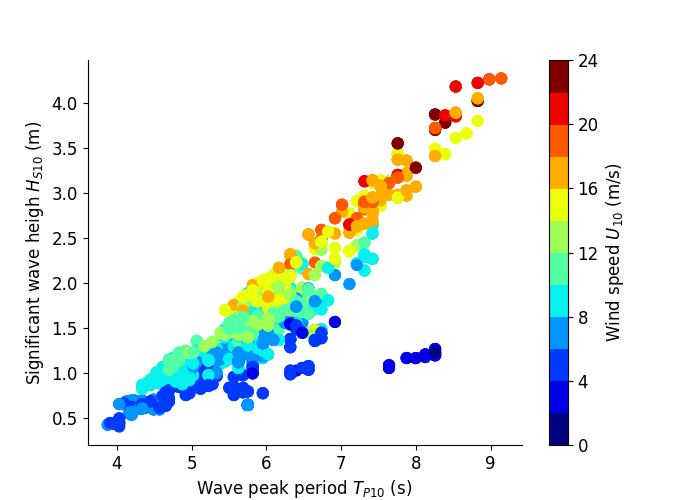

In [446]:
cmap = plt.cm.jet  # define the colormap
bounds = np.linspace(0, 24, 13)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

plt.figure(figsize=(7,5))

sc = plt.scatter(df10.Tp10,
            df10.Hs10,
            c=df10.U10,
            s=60,
            cmap=cmap,
            norm=norm
           )

cbar = plt.colorbar(sc)
cbar.set_label('Wind speed $U_{10}$ (m/s)')
#plt.scatter(Hs10, d10, color='k', alpha=0.1)
plt.title('a', y=-0.2)
#plt.ylim([0,8])
#plt.xlim([0,4.5])
plt.xlabel('Wave peak period $T_{P10}$ (s)')
plt.ylabel('Significant wave heigh $H_{S10}$ (m)')
plt.savefig('Hs_Tp_U.png', dpi=150)

<IPython.core.display.Javascript object>


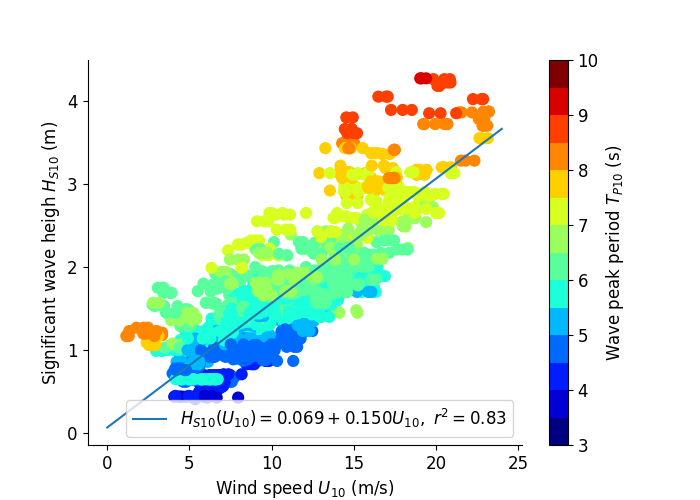

In [456]:
cmap = plt.cm.jet  # define the colormap
bounds = np.linspace(3, 10, 15)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

plt.figure(figsize=(7,5))

sc = plt.scatter(df10.U10,
            df10.Hs10,
            c=df10.Tp10,
            s=60,
            cmap=cmap,
            norm=norm
           )

cbar = plt.colorbar(sc)
cbar.set_label('Wave peak period $T_{P10}$ (s)')
plt.plot([x for x in range(0, 25)],
         [windWaveCorr.intercept + windWaveCorr.slope*x for x in range(0, 25)],
         label='$H_{S10}(U_{10})$'+
         '$ = {:1.3f} + {:1.3f}'.format(windWaveCorr.intercept, windWaveCorr.slope)+
         ' U_{10}'+
         ', ~r^2 = {:1.2f}$'.format(windWaveCorr.r_value),
        )
#plt.scatter(Hs10, d10, color='k', alpha=0.1)
plt.title('a', y=-0.2)
#plt.ylim([0,8])
#plt.xlim([0,4.5])
plt.xlabel('Wind speed $U_{10}$ (m/s)')
plt.ylabel('Significant wave heigh $H_{S10}$ (m)')
plt.legend()
plt.savefig('U_Hs_Tp.png', dpi=150)

<IPython.core.display.Javascript object>


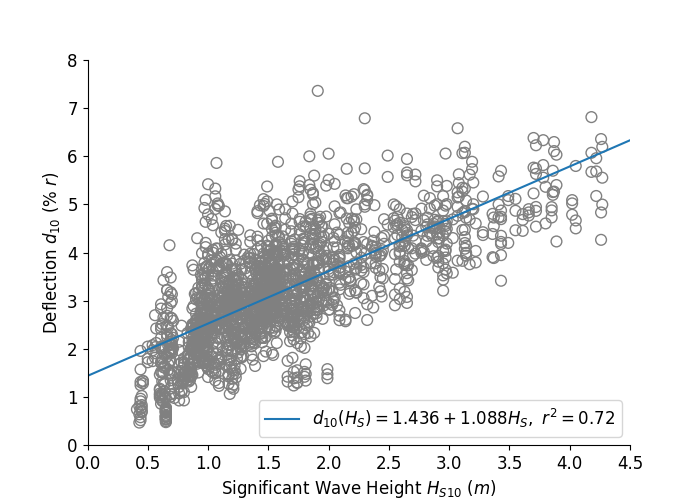

In [518]:
plt.figure(figsize=(7,5))

plt.scatter(df10.Hs10,
            df10.d10,
            color='',
            s=60,
            edgecolor='grey'
           )

plt.plot([x for x in range(0, 6)],
         [waveCorr.intercept + waveCorr.slope*x for x in range(0, 6)],
         label='$d_{10}(H_{S})$'+'$ = {:1.3f} + {:1.3f} H_S, ~r^2 = {:1.2f}$'.format(waveCorr.intercept,
                                                                                     waveCorr.slope, 
                                                                                     waveCorr.r_value),
        )

#plt.scatter(Hs10, d10, color='k', alpha=0.1)
plt.title('a', y=-0.2)
plt.ylim([0,8])
plt.xlim([0,4.5])
plt.xlabel('Significant Wave Height $H_{S10} ~ (m)$')
plt.ylabel('Deflection $d_{10} ~ (\% ~ r)$')
plt.legend(loc='lower right')
plt.savefig('d10_Hs.png', dpi=150)

<IPython.core.display.Javascript object>


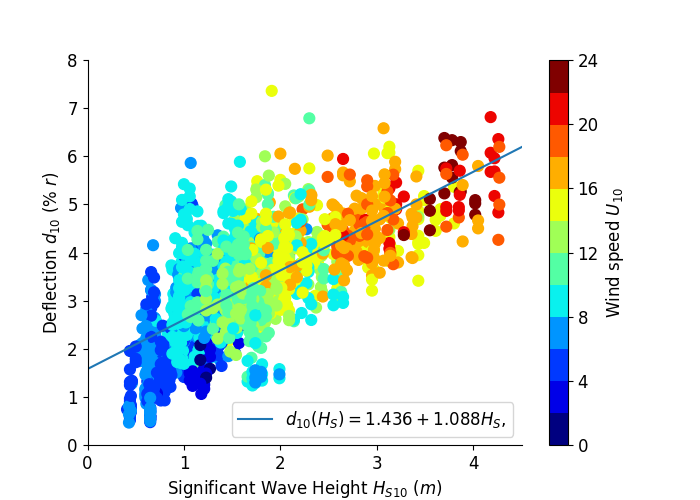

In [458]:
cmap = plt.cm.jet  # define the colormap

# define the bins and normalize
bounds = np.linspace(0, 24, 13)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
plt.figure(figsize=(7,5))
"""
sc = plt.scatter(Hs10,
                 d10,
                 c=U10,
                 cmap=cmap,
                 norm=norm,
                 s=60,
                )
"""
sc = plt.scatter(df10.Hs10,
                 df10.d10,
                 c=df10.U10,
                 cmap=cmap,
                 norm=norm,
                 s=60,
                )

#plot regression
cbar = plt.colorbar(sc)
cbar.set_label('Wind speed $U_{10}$')
#plt.axhline(y=2.5, label='blade installation limit', color='r')
plt.plot([x for x in range(0, 6)],
         [intercept + slope*x for x in range(0, 6)],
         label='$d_{10}(H_{S})$'+'$ = {:1.3f} + {:1.3f} H_S, `~ r^2 = {:1.2f}$'.format(waveCorr.intercept,
                                                                                     waveCorr.slope, 
                                                                                     waveCorr.r_value),
        )

#plt.scatter(Hs10, d10, color='k', alpha=0.1)

plt.ylim([0,8])
plt.xlim([0,4.5])
plt.xlabel('Significant Wave Height $H_{S10} ~ (m)$')
plt.ylabel('Deflection $d_{10} ~ (\% ~ r)$')
plt.legend(loc='lower right')
plt.savefig('d10_Hs_U.png', dpi=150)

### d10 vs Tz

<IPython.core.display.Javascript object>


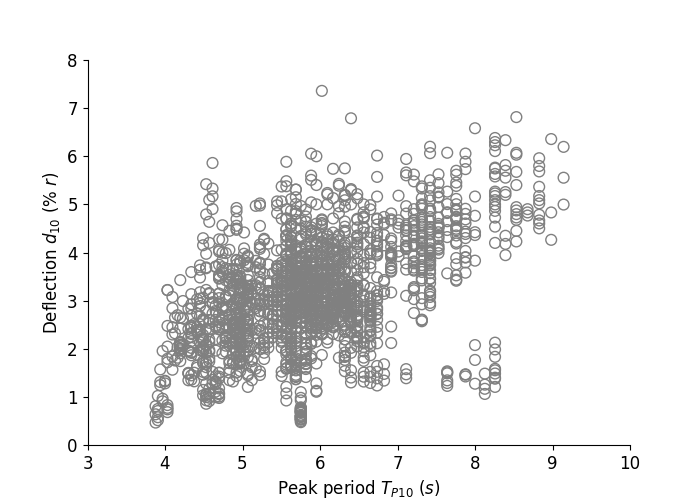

In [377]:
plt.figure(figsize=(7,5))
plt.scatter(df10.Tp10,
            df10.d10,
            color='',
            edgecolors='grey',
            s=60,
            )

#plt.plot([1/0.24, 1/0.24], [0, 0.2], label='eigenperiod')
plt.ylim([0, 8])
plt.xlim([3, 10])
plt.xlabel('Peak period $T_{P10} ~ (s)$')
plt.ylabel('Deflection $d_{10} ~ (\% ~ r)$')
#plt.legend(ncol=2)
plt.savefig('d10_Tp.png', dpi=150)

<IPython.core.display.Javascript object>


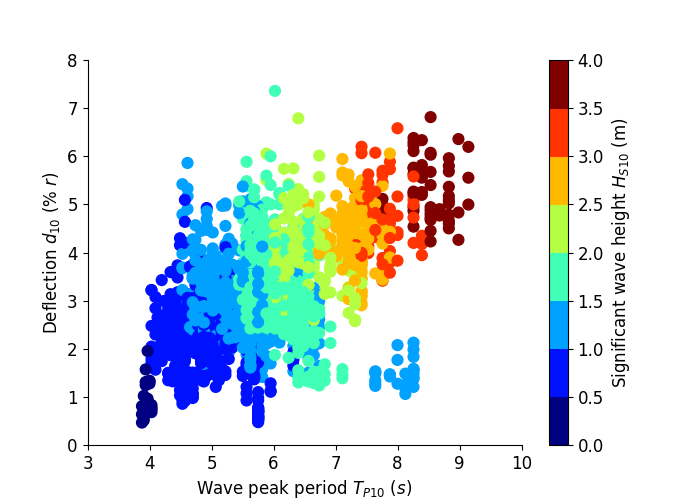

In [423]:
cmap = plt.cm.jet  # define the colormap

# define the bins and normalize
bounds = np.linspace(0, 4, 9)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

plt.figure(figsize=(7,5))
sc = plt.scatter(df10.Tp10,
                 df10.d10,
                 c=df10.Hs10,
                 cmap=cmap,
                 norm=norm,
                 s=60,
                 #alpha=0.5,
                 #edgecolor='white'
           )
cbar = plt.colorbar(sc)
cbar.set_label('Significant wave height $H_{S10}$ (m)')

plt.xlim([3, 10])
#plt.plot([1/0.24, 1/0.24], [0, 0.2], label='eigenperiod')
#plt.legend(ncol=2)
plt.ylim([0,8])
plt.xlabel('Wave peak period $T_{P10} ~ (s)$')
plt.ylabel('Deflection $d_{10} ~ (\% ~ r)$')
plt.savefig('d10_Tp_Hs.png', dpi=150)

### d10 vs U

<IPython.core.display.Javascript object>


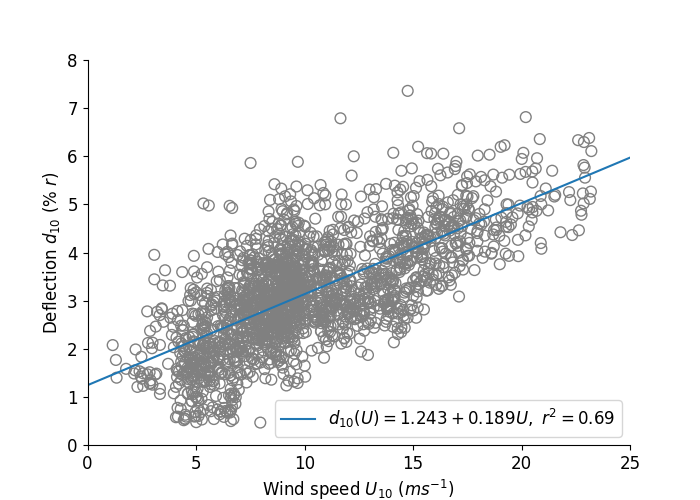

In [459]:
plt.figure(figsize=(7,5))

plt.scatter(df10.U10,
            df10.d10,
            color='',
            edgecolors='grey',
            s=60
           )

plt.plot([x for x in range(0, 30, 5)],
         [windCorr.intercept + windCorr.slope*x for x in range(0, 30, 5)],
         label='$d_{10}(U)$'+'$ = {:1.3f} + {:1.3f} U, ~r^2 = {:1.2f}$'.format(windCorr.intercept, 
                                                                                      windCorr.slope,
                                                                                      windCorr.r_value),
        )
plt.ylim([0,8])
plt.xlim([0,25])
plt.legend()
plt.xlabel('Wind speed $U_{10} ~(m s^{-1})$')
plt.ylabel('Deflection $d_{10} ~ (\% ~ r)$')
#plt.legend(ncol=2)
plt.savefig('d10_U.png', dpi=150)

<IPython.core.display.Javascript object>


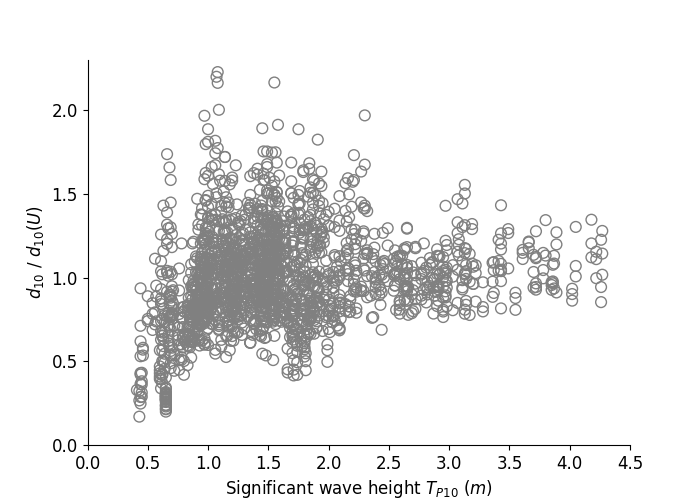

In [419]:
plt.figure(figsize=(7,5))

plt.scatter(df10.Hs10,
            df10.d10_windModel,
            color='',
            edgecolors='grey',
            s=60
           )

plt.ylim([0,2.3])
plt.xlim([0,4.5])
plt.xlabel('Significant wave height $T_{P10} ~(m)$')
plt.ylabel('$d_{10} ~ / ~ d_{10}(U)$')
#plt.legend(ncol=2)
plt.savefig('d10U_Hs.png', dpi=150)

### d10/Hs vs U

<IPython.core.display.Javascript object>


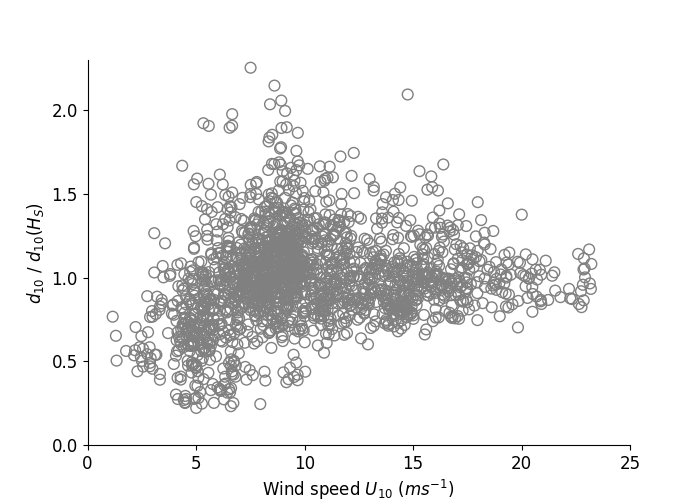

In [522]:
plt.figure(figsize=(7,5))

#plt.axvspan(ymin=0, ymax=1, xmin=5, xmax=10, label="critical wind speed", hatch='', alpha=0.25)

selection = df10.Tp10 < 6

plt.scatter(df10.U10,
            df10.d10_waveModel,
            color='',
            edgecolors='grey',
            s=60,
           )
plt.ylim([0,2.3])
plt.xlim([0,25])
plt.xlabel('Wind speed $U_{10} ~ (m s^{-1})$')
plt.ylabel('$d_{10} ~ / ~ d_{10}(H_{S})$')
#plt.legend(ncol=2,loc='upper right')
plt.savefig('d10Hs_U.png', dpi=150)

<IPython.core.display.Javascript object>


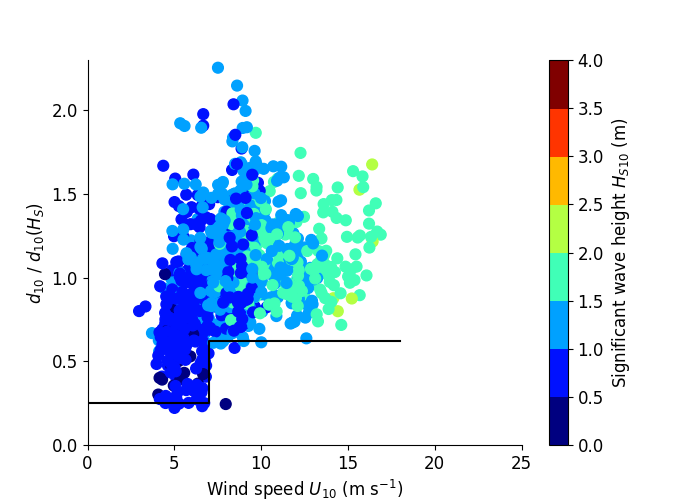

In [539]:
plt.figure(figsize=(7,5))
bounds = np.linspace(0, 4, 9)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
#plt.axvspan(ymin=0, ymax=1, xmin=5, xmax=10, label="critical wind speed", hatch='', alpha=0.25)

selection = df10.Tp10 < 6

sc = plt.scatter(df10.loc[selection].U10,
            df10.loc[selection].d10_waveModel,
            c=df10.loc[selection].Hs10,
            cmap=cmap,
            norm=norm,
            s=60,
           )
cbar = plt.colorbar(sc)
cbar.set_label('Significant wave height $H_{S10}$ (m)')
plt.plot([0, 7, 7, 18], [0.25,0.25,0.62,0.62], color='k')
plt.ylim([0,2.3])
plt.xlim([0,25])
plt.xlabel('Wind speed $U_{10}$ (m s$^{-1}$)')
plt.ylabel('$d_{10} ~ / ~ d_{10}(H_{S})$')
#plt.legend(ncol=2,loc='upper right')
plt.savefig('d10Hs_U_Tpselect.png', dpi=150)

<IPython.core.display.Javascript object>


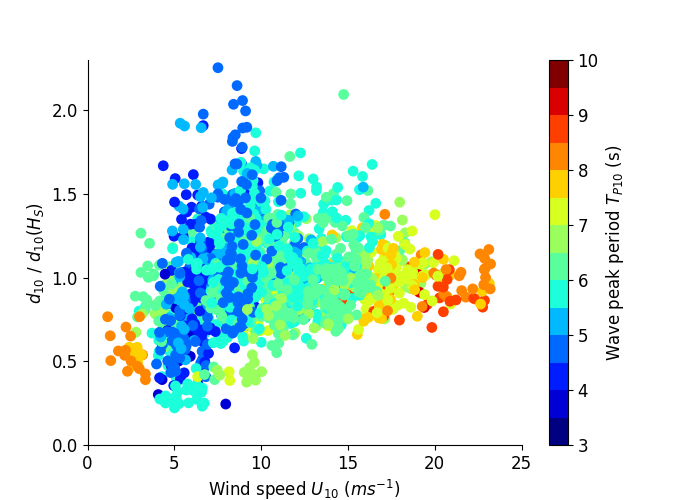

In [417]:
cmap = plt.cm.jet  # define the colormap

# define the bins and normalize
bounds = np.linspace(3, 10, 15)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

plt.figure(figsize=(7,5))

#plt.axvspan(ymin=0, ymax=1, xmin=5, xmax=10, label="critical wind speed", hatch='', alpha=0.25)

sc = plt.scatter(df10.U10,
                 df10.d10_waveModel,
                 c = df10.Tp10,
                 cmap = cmap,
                 norm=norm,
                 s=60,
                 edgecolors='',
                )

cbar = plt.colorbar(sc)
cbar.set_label('Wave peak period $T_{P10}$ (s)')
plt.ylim([0,2.3])
plt.xlim([0,25])
plt.xlabel('Wind speed ${U_{10}} ~ (m s^{-1})$')
plt.ylabel('$d_{10} ~ / ~ d_{10}(H_S)$')
#plt.legend(ncol=2,loc='upper right')
plt.savefig('d10Hs_U_Tp.png', dpi=150)

### d10/Hs vs Tz

<IPython.core.display.Javascript object>


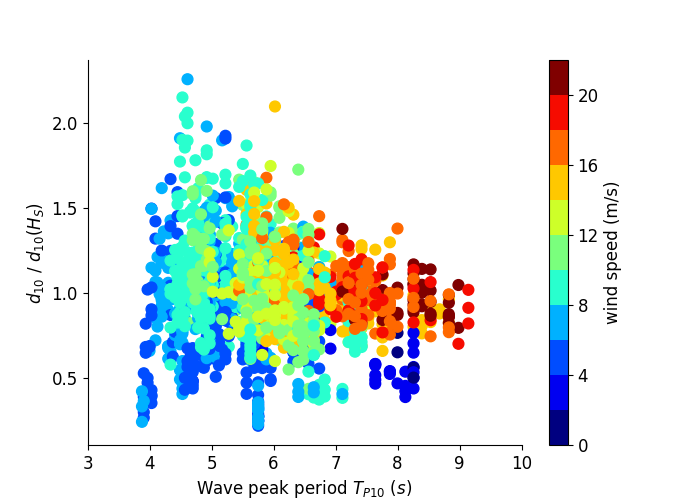

In [397]:
cmap = plt.cm.jet  # define the colormap

# define the bins and normalize
bounds = np.linspace(0, 22, 12)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)


plt.figure(figsize=(7,5))

sc = plt.scatter(df10.Tp10,
                 df10.d10_waveModel,
                 c = df10.U10,
                 cmap = cmap,
                 norm = norm,
                 s=60,
                 )

cbar = plt.colorbar(sc)
cbar.set_label('wind speed (m/s)')

#plt.plot([1/0.24, 1/0.24], [0, 0.2], label='eigenperiod')
plt.xlabel('Wave peak period $T_{P10} ~ (s)$')
plt.ylabel('$d_{10} ~ / ~ d_{10}(H_S)$')
plt.xlim([3, 10])
#plt.legend(ncol=2)
plt.savefig('d10Hs_Tp_U.png', dpi=150)

<IPython.core.display.Javascript object>


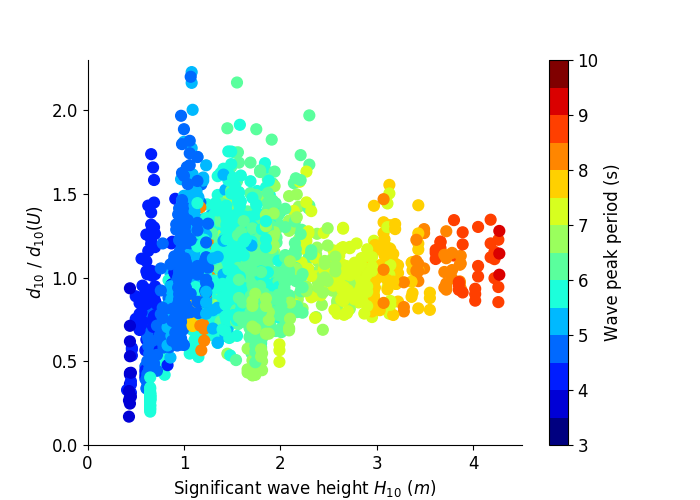

In [430]:
cmap = plt.cm.jet  # define the colormap

# define the bins and normalize
bounds = np.linspace(3, 10, 15)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)


plt.figure(figsize=(7,5))

sc = plt.scatter(df10.Hs10,
                 df10.d10_windModel,
                 c = df10.Tp10,
                 cmap = cmap,
                 norm = norm,
                 s=60,
                 )

cbar = plt.colorbar(sc)
cbar.set_label('Wave peak period (s)')

#plt.plot([1/0.24, 1/0.24], [0, 0.2], label='eigenperiod')
plt.xlabel('Significant wave height $H_{10} ~ (m)$')
plt.ylabel('$d_{10} ~ / ~ d_{10}(U)$')
plt.xlim([0, 4.5])
plt.ylim([0, 2.3])
#plt.lege0nd(ncol=2)
plt.savefig('d10U_Hs_Tp.png', dpi=150)

<IPython.core.display.Javascript object>


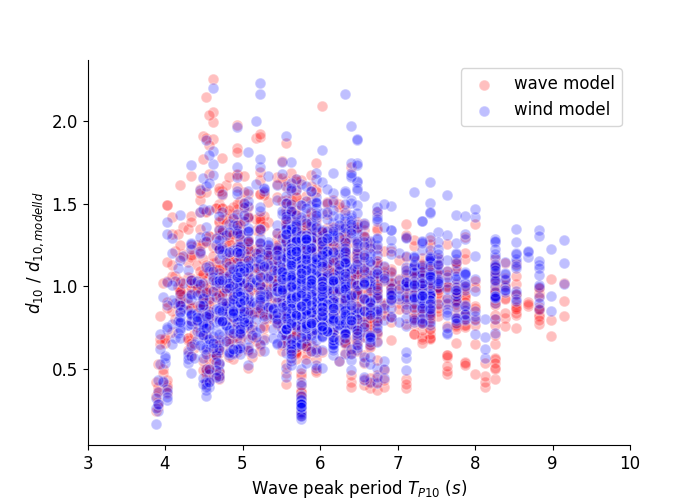

In [413]:
plt.figure(figsize=(7,5))

plt.scatter(df10.Tp10,
            df10.d10_waveModel,
            color='red',
            s=60,
            label='wave model',
            alpha=0.25,
            edgecolors='white'
           )

plt.scatter(df10.Tp10,
            df10.d10_windModel,
            color='blue',
            s=60,
            label='wind model',
            alpha=0.25,
            edgecolors='white'
           )

plt.legend()
#plt.plot([1/0.24, 1/0.24], [0, 0.2], label='eigenperiod')
plt.xlabel('Wave peak period $T_{P10} ~ (s)$')
plt.ylabel('$d_{10} ~ / ~ d_{10,modelld}$')
plt.xlim([3, 10])
plt.savefig('model_comparison.png', dpi=150)
#plt.legend(ncol=2)

<IPython.core.display.Javascript object>


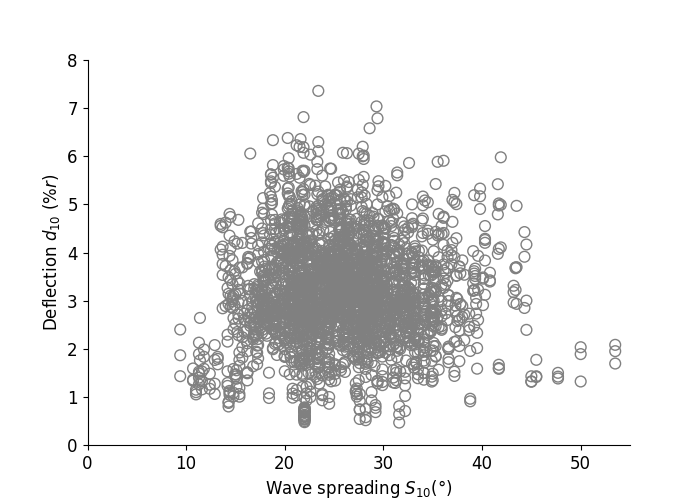

In [432]:
plt.figure(figsize=(7,5))
plt.scatter(df.wave_spread.resample('10min').mean(),
            (1 - (3 - df.deflection.resample('10min').mean())/3)*100,
            color='',
            edgecolors='grey',
            s=60,
           )
plt.xlim([0, 55])
plt.ylim([0, 8])
plt.xlabel('Wave spreading $S_{10}(\degree)$')
plt.ylabel('Deflection $d_{10} ~ (\%r)$')
plt.savefig('d10_wSpread.png', dpi=150)

/home/san/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


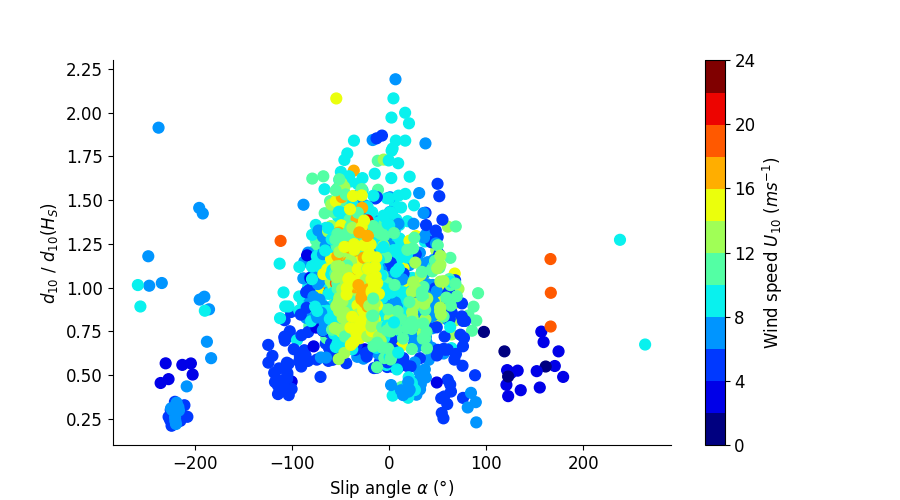

In [292]:
cmap = plt.cm.jet  # define the colormap

# define the bins and normalize
bounds = np.linspace(0, 24, 13)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
plt.figure(figsize=(9,5))
sc = plt.scatter(df.wind_dir_corr.resample('10min').mean() - df.wave_dir.resample('10min').mean(),
                 (1 - (3 - df.deflection.resample('10min').mean())/3)*100,
                 #(1 - (3 - df.deflection.resample('10min').mean())/3)*100/(slope * df.Hs.resample('10min').mean() + intercept),
                 c=df.wind_speed.resample('10min').mean(),
            cmap=cmap,
            norm=norm,
            s=60,
           )
cbar = plt.colorbar(sc)
cbar.set_label('Wind speed $U_{10} ~ (ms^{-1})$')
plt.xlabel('Slip angle $ \\alpha ~ (\degree)$')
#plt.ylabel('$d_{10} ~/ ~ d_{10}(H_S)$')
plt.ylabel('$d_{10} $')
plt.savefig('d10_alpha_U.png', dpi=150)

# define the bins and normalize
bounds = np.linspace(0, 24, 13)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
plt.figure(figsize=(9,5))
sc = plt.scatter(df.wind_dir_corr.resample('10min').mean() - df.wave_dir.resample('10min').mean(),
                 #(1 - (3 - df.deflection.resample('10min').mean())/3)*100,
                 (1 - (3 - df.deflection.resample('10min').mean())/3)*100/(slope * df.Hs.resample('10min').mean() + intercept),
                 c=df.wind_speed.resample('10min').mean(),
            cmap=cmap,
            norm=norm,
            s=60,
           )
cbar = plt.colorbar(sc)
cbar.set_label('Wind speed $U_{10} ~ (ms^{-1})$')
plt.ylabel('$d_{10} ~/ ~ d_{10}(H_S)$')
plt.xlabel('Slip angle $ \\alpha ~ (\degree)$')
plt.savefig('d10Hs_alpha_U.png', dpi=150)

# define the bins and normalize
bounds = np.linspace(0, 5, 11)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
plt.figure(figsize=(9,5))
sc = plt.scatter(df.wind_dir_corr.resample('10min').mean() - df.wave_dir.resample('10min').mean(),
            #(1 - (3 - df.deflection.resample('10min').mean())/3)*100,
                 (1 - (3 - df.deflection.resample('10min').mean())/3)*100/(slope * df.Hs.resample('10min').mean() + intercept),
                 c=df.Hs.resample('10min').mean(),
            cmap=cmap,
            norm=norm,
            s=60,
           )
cbar = plt.colorbar(sc)
cbar.set_label('Significant wave height $H_{S10}$')
plt.xlabel('Slip angle $ \\alpha ~ (\degree)$')
plt.ylabel('$d_{10} ~/ ~ d_{10}(H_S)$')

# define the bins and normalize
bounds = np.linspace(3, 8, 11)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
plt.figure(figsize=(9,5))
sc = plt.scatter(df.wind_dir_corr.resample('10min').mean() - df.wave_dir.resample('10min').mean(),
            #(1 - (3 - df.deflection.resample('10min').mean())/3)*100,
                 (1 - (3 - df.deflection.resample('10min').mean())/3)*100/(slope * df.Hs.resample('10min').mean() + intercept),
                 c=df.Tp.resample('10min').mean(),
            cmap=cmap,
            norm=norm,
            s=60,
           )
cbar = plt.colorbar(sc)
cbar.set_label('Peak period $T_{P10} ~ (s)$')
plt.xlabel('Slip angle $ \\alpha ~ (\degree)$')
plt.ylabel('$d_{10} ~/ ~ d_{10}(H_S)$')